<a href="https://colab.research.google.com/github/yamanaly/learning-from-data/blob/main/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("This will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: '%.3f' % x)
pd.set_option("display.max_columns", None)



In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
df = pd.read_csv("/content/drive/MyDrive/assignment1/Churn_Modelling.csv", index_col='RowNumber')

In [98]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [100]:
df.isnull().sum().sum()

0

In [92]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerId,10000.000,NaN,NaN,NaN,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.000,NaN,NaN,NaN,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.000,NaN,NaN,NaN,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,NaN,NaN,NaN,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,NaN,NaN,NaN,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,NaN,NaN,NaN,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,NaN,NaN,NaN,0.706,0.456,0.000,0.000,1.000,1.000,1.000


In [93]:
df.drop(columns=["CustomerId","Surname"],axis=1,inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [70]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [71]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [72]:
gender= pd.get_dummies(df.Gender)

In [73]:
geography = pd.get_dummies(df.Geography)

In [74]:
df =pd.concat([df,gender,geography],axis=1)

In [75]:
df.drop(columns=["Gender","Geography"],axis=1,inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   Female           10000 non-null  uint8  
 10  Male             10000 non-null  uint8  
 11  France           10000 non-null  uint8  
 12  Germany          10000 non-null  uint8  
 13  Spain            10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 830.1 KB


In [77]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
RowNumber,,,,,,,,,,,,,,
1,619,42,2,0.000,1,1,1,101348.880,1,1,0,1,0,0
2,608,41,1,83807.860,1,0,1,112542.580,0,1,0,0,0,1
3,502,42,8,159660.800,3,1,0,113931.570,1,1,0,1,0,0
4,699,39,1,0.000,2,0,0,93826.630,0,1,0,1,0,0
5,850,43,2,125510.820,1,1,1,79084.100,0,1,0,0,0,1


In [78]:
df.shape

(10000, 14)

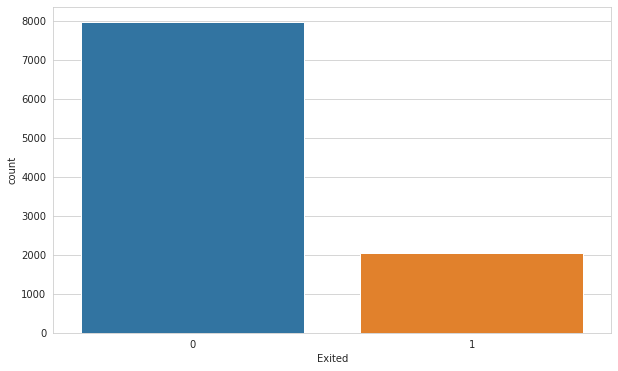

In [79]:
sns.countplot(df.Exited);

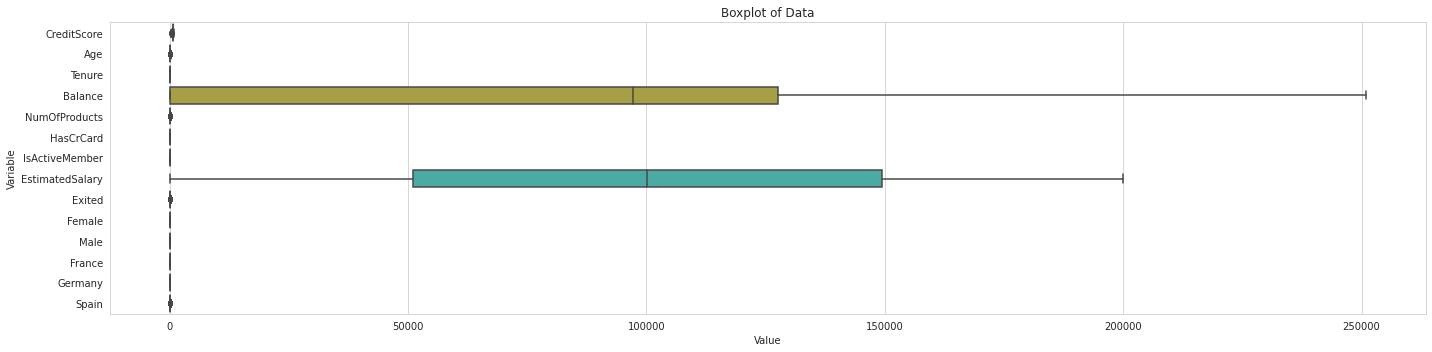

In [84]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, orient="h", linewidth=1.5)
plt.title("Boxplot of Data")
plt.ylabel("Variable")
plt.xlabel("Value")
plt.tight_layout()
plt.show()

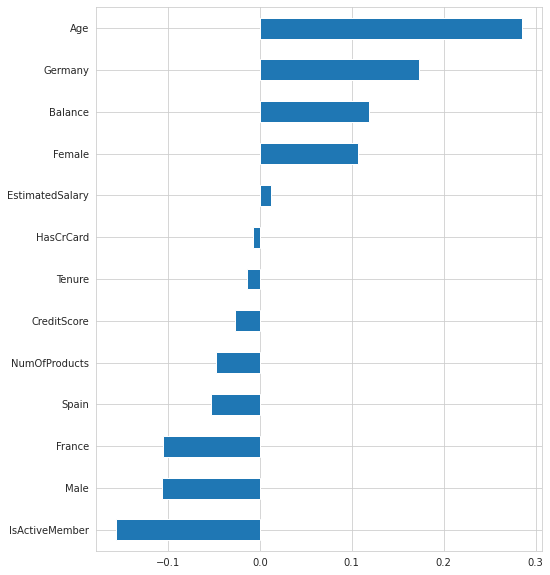

In [19]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

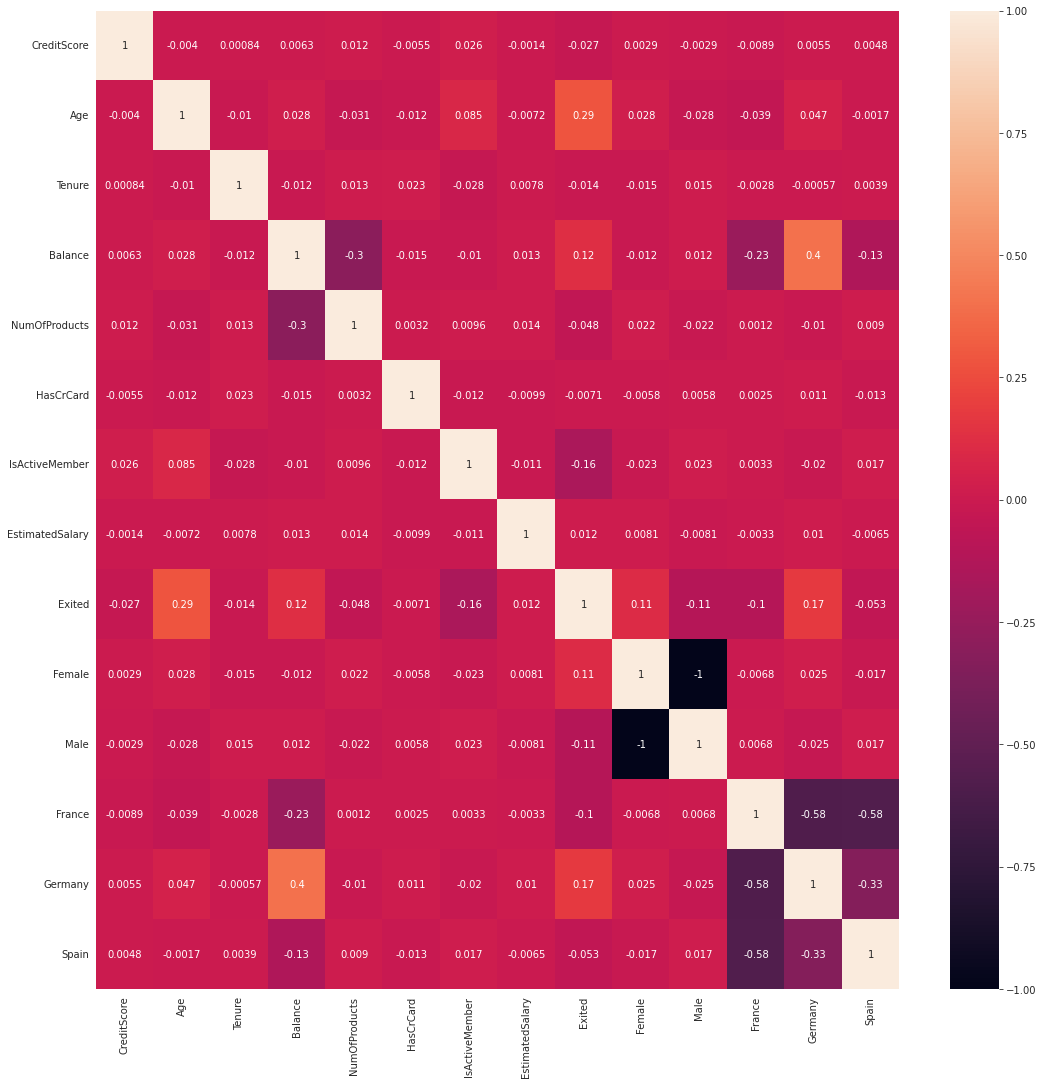

In [21]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True);

# Preprocessing of Data
- Train | Test Split, Scalling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [23]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [24]:
seed = 42

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = seed)

In [26]:
scaler = MinMaxScaler()

In [27]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [29]:
X_train.shape

(8000, 13)

In [265]:
X_test.shape

(2000, 13)

In [266]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(12, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["recall"])

In [267]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 500, verbose=1)

Epoch 1/500
57/57 [==============================] - 1s 6ms/step - loss: 0.5791 - accuracy: 0.7947 - val_loss: 0.4861 - val_accuracy: 0.8100
Epoch 2/500
57/57 [==============================] - 0s 3ms/step - loss: 0.4875 - accuracy: 0.7947 - val_loss: 0.4609 - val_accuracy: 0.8100
Epoch 3/500
57/57 [==============================] - 0s 4ms/step - loss: 0.4726 - accuracy: 0.7949 - val_loss: 0.4517 - val_accuracy: 0.8100
Epoch 4/500
57/57 [==============================] - 0s 4ms/step - loss: 0.4640 - accuracy: 0.7999 - val_loss: 0.4454 - val_accuracy: 0.8175
Epoch 5/500
57/57 [==============================] - 0s 4ms/step - loss: 0.4575 - accuracy: 0.8035 - val_loss: 0.4402 - val_accuracy: 0.8188
Epoch 6/500
57/57 [==============================] - 0s 3ms/step - loss: 0.4497 - accuracy: 0.8072 - val_loss: 0.4345 - val_accuracy: 0.8200
Epoch 7/500
57/57 [==============================] - 0s 3ms/step - loss: 0.4430 - accuracy: 0.8100 - val_loss: 0.4283 - val_accuracy: 0.8238
Epoch 8/500
5

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [268]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 24)                336       
                                                                 
 dense_129 (Dense)           (None, 12)                300       
                                                                 
 dense_130 (Dense)           (None, 6)                 78        
                                                                 
 dense_131 (Dense)           (None, 1)                 7         
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [269]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.579,0.795,0.486,0.810
1,0.487,0.795,0.461,0.810
2,0.473,0.795,0.452,0.810
3,0.464,0.800,0.445,0.817
4,0.457,0.803,0.440,0.819


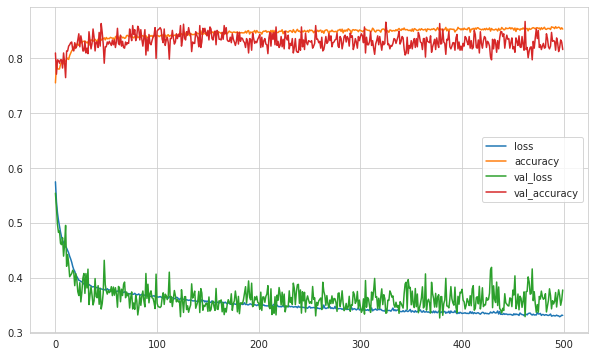

In [299]:
loss_df.plot();

In [300]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.5119917392730713
recall :  0.7960687875747681


In [301]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1178  415]
 [  83  324]]
              precision    recall  f1-score   support

           0       0.93      0.74      0.83      1593
           1       0.44      0.80      0.57       407

    accuracy                           0.75      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.83      0.75      0.77      2000



In [30]:
from sklearn.metrics import recall_score,\
                            f1_score, precision_recall_curve,\
                            average_precision_score

63/63 [==============================] - 0s 1ms/step


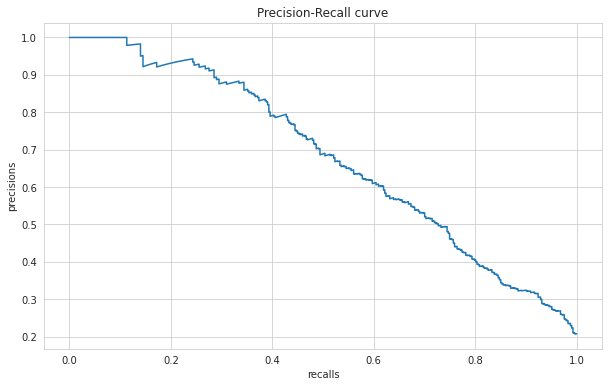

In [286]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [312]:
average_precision_score(y_test, y_pred_proba)

0.6799101127280817

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [31]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weight = {0: class_weight[0], 1: class_weight[1]}
class_weight

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [314]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(28, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(14, activation = "relu"))
model.add(Dense(7, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [315]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 500, verbose=1, class_weight=class_weight)

Epoch 1/500
57/57 [==============================] - 1s 8ms/step - loss: 0.6842 - recall: 0.5697 - val_loss: 0.6974 - val_recall: 0.7368
Epoch 2/500
57/57 [==============================] - 0s 4ms/step - loss: 0.6563 - recall: 0.6502 - val_loss: 0.6594 - val_recall: 0.6316
Epoch 3/500
57/57 [==============================] - 0s 4ms/step - loss: 0.6328 - recall: 0.6543 - val_loss: 0.6116 - val_recall: 0.6184
Epoch 4/500
57/57 [==============================] - 0s 4ms/step - loss: 0.6172 - recall: 0.6739 - val_loss: 0.5809 - val_recall: 0.6250
Epoch 5/500
57/57 [==============================] - 0s 5ms/step - loss: 0.6059 - recall: 0.6759 - val_loss: 0.5964 - val_recall: 0.6908
Epoch 6/500
57/57 [==============================] - 0s 5ms/step - loss: 0.5932 - recall: 0.6976 - val_loss: 0.5604 - val_recall: 0.6316
Epoch 7/500
57/57 [==============================] - 0s 4ms/step - loss: 0.5833 - recall: 0.7084 - val_loss: 0.5702 - val_recall: 0.6974
Epoch 8/500
57/57 [======================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [316]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_148 (Dense)           (None, 28)                392       
                                                                 
 dense_149 (Dense)           (None, 14)                406       
                                                                 
 dense_150 (Dense)           (None, 7)                 105       
                                                                 
 dense_151 (Dense)           (None, 1)                 8         
                                                                 
Total params: 911
Trainable params: 911
Non-trainable params: 0
_________________________________________________________________


In [317]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.684,0.570,0.697,0.737
1,0.656,0.650,0.659,0.632
2,0.633,0.654,0.612,0.618
3,0.617,0.674,0.581,0.625
4,0.606,0.676,0.596,0.691


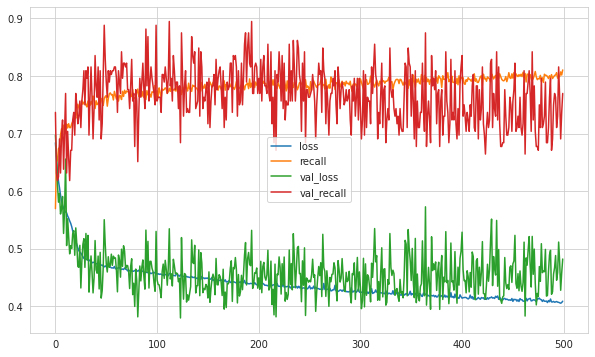

In [318]:
loss_df.plot();

In [319]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.4981940686702728
recall :  0.7567567825317383


In [320]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1210  383]
 [  99  308]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1593
           1       0.45      0.76      0.56       407

    accuracy                           0.76      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000



63/63 [==============================] - 0s 1ms/step


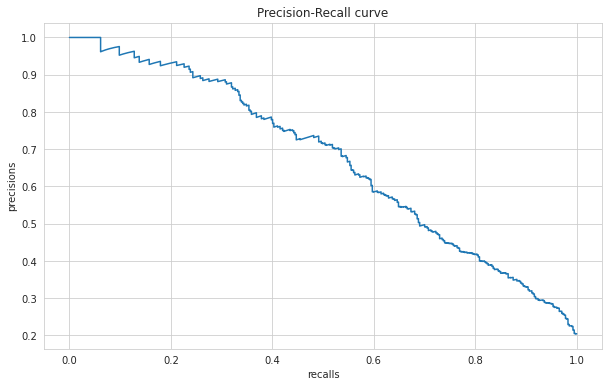

In [321]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [322]:
average_precision_score(y_test, y_pred_proba)

0.6715078349158587

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [32]:
from tensorflow.keras.optimizers import Adam

In [328]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(12, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [329]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 500, verbose = 1, class_weight = class_weight)

Epoch 1/500
57/57 [==============================] - 1s 8ms/step - loss: 0.6599 - recall: 0.6015 - val_loss: 0.6112 - val_recall: 0.5921
Epoch 2/500
57/57 [==============================] - 0s 4ms/step - loss: 0.6171 - recall: 0.6624 - val_loss: 0.6302 - val_recall: 0.7303
Epoch 3/500
57/57 [==============================] - 0s 4ms/step - loss: 0.5937 - recall: 0.6922 - val_loss: 0.5900 - val_recall: 0.6842
Epoch 4/500
57/57 [==============================] - 0s 5ms/step - loss: 0.5781 - recall: 0.7003 - val_loss: 0.4983 - val_recall: 0.5000
Epoch 5/500
57/57 [==============================] - 0s 4ms/step - loss: 0.5748 - recall: 0.6949 - val_loss: 0.5280 - val_recall: 0.6184
Epoch 6/500
57/57 [==============================] - 0s 4ms/step - loss: 0.5632 - recall: 0.7226 - val_loss: 0.6031 - val_recall: 0.7434
Epoch 7/500
57/57 [==============================] - 0s 4ms/step - loss: 0.5482 - recall: 0.7206 - val_loss: 0.4827 - val_recall: 0.6513
Epoch 8/500
57/57 [======================

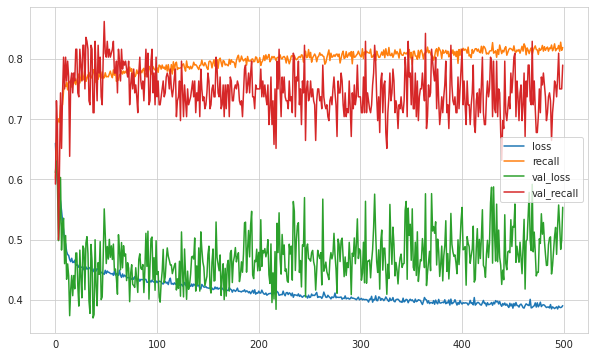

In [330]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [331]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1135  458]
 [  89  318]]
              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1593
           1       0.41      0.78      0.54       407

    accuracy                           0.73      2000
   macro avg       0.67      0.75      0.67      2000
weighted avg       0.82      0.73      0.75      2000



### Add Dropout Layer

In [33]:
from tensorflow.keras.layers import Dropout

In [336]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(12, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(6, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.0003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [337]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 500, verbose = 1, class_weight=class_weight)

Epoch 1/500
57/57 [==============================] - 1s 9ms/step - loss: 0.6934 - recall: 0.2510 - val_loss: 0.6660 - val_recall: 0.2171
Epoch 2/500
57/57 [==============================] - 0s 4ms/step - loss: 0.6902 - recall: 0.3701 - val_loss: 0.6741 - val_recall: 0.5066
Epoch 3/500
57/57 [==============================] - 0s 5ms/step - loss: 0.6862 - recall: 0.5183 - val_loss: 0.6790 - val_recall: 0.5658
Epoch 4/500
57/57 [==============================] - 0s 4ms/step - loss: 0.6812 - recall: 0.5406 - val_loss: 0.6787 - val_recall: 0.5921
Epoch 5/500
57/57 [==============================] - 0s 4ms/step - loss: 0.6772 - recall: 0.5656 - val_loss: 0.6705 - val_recall: 0.5789
Epoch 6/500
57/57 [==============================] - 0s 5ms/step - loss: 0.6743 - recall: 0.5609 - val_loss: 0.6629 - val_recall: 0.5658
Epoch 7/500
57/57 [==============================] - 0s 4ms/step - loss: 0.6712 - recall: 0.5670 - val_loss: 0.6570 - val_recall: 0.5724
Epoch 8/500
57/57 [======================

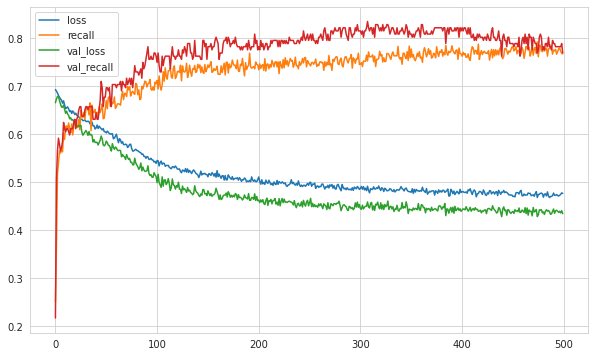

In [338]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [339]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.4550595283508301
recall :  0.7837837934494019


In [340]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1248  345]
 [  88  319]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1593
           1       0.48      0.78      0.60       407

    accuracy                           0.78      2000
   macro avg       0.71      0.78      0.72      2000
weighted avg       0.84      0.78      0.80      2000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [343]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(12, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [344]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [345]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 500, verbose = 1, class_weight=class_weight,
          callbacks = [early_stop])

Epoch 1/500
57/57 [==============================] - 2s 18ms/step - loss: 0.6791 - recall: 0.4804 - val_loss: 0.6886 - val_recall: 0.7105
Epoch 2/500
57/57 [==============================] - 0s 7ms/step - loss: 0.6504 - recall: 0.6516 - val_loss: 0.6426 - val_recall: 0.6316
Epoch 3/500
57/57 [==============================] - 0s 7ms/step - loss: 0.6291 - recall: 0.6414 - val_loss: 0.6108 - val_recall: 0.5921
Epoch 4/500
57/57 [==============================] - 0s 5ms/step - loss: 0.6166 - recall: 0.6637 - val_loss: 0.5867 - val_recall: 0.5987
Epoch 5/500
57/57 [==============================] - 0s 5ms/step - loss: 0.6076 - recall: 0.6691 - val_loss: 0.5950 - val_recall: 0.6645
Epoch 6/500
57/57 [==============================] - 0s 5ms/step - loss: 0.5974 - recall: 0.6915 - val_loss: 0.5691 - val_recall: 0.6184
Epoch 7/500
57/57 [==============================] - 0s 5ms/step - loss: 0.5894 - recall: 0.7064 - val_loss: 0.5854 - val_recall: 0.6776
Epoch 8/500
57/57 [=====================

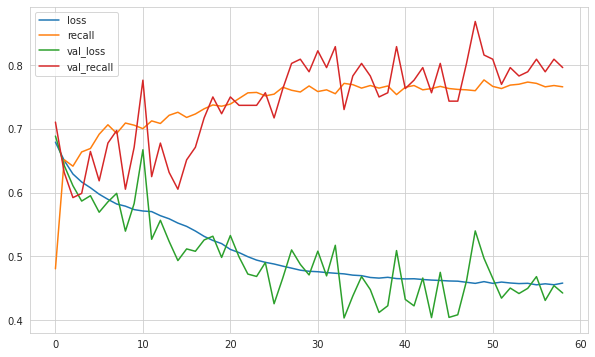

In [346]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [347]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.41974928975105286
recall :  0.687960684299469


In [348]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1328  265]
 [ 127  280]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1593
           1       0.51      0.69      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.83      0.80      0.81      2000



#### Monitor the "val_recall" as metric

In [349]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(12, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [356]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "min", verbose = 1, patience = 75, restore_best_weights = True)

In [357]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 500, verbose = 1, class_weight=class_weight,
          callbacks = [early_stop])

Epoch 1/500
57/57 [==============================] - 0s 4ms/step - loss: 0.5809 - recall: 0.6928 - val_loss: 0.5929 - val_recall: 0.6842
Epoch 2/500
57/57 [==============================] - 0s 4ms/step - loss: 0.5784 - recall: 0.6962 - val_loss: 0.6002 - val_recall: 0.6908
Epoch 3/500
57/57 [==============================] - 0s 4ms/step - loss: 0.5768 - recall: 0.7057 - val_loss: 0.5721 - val_recall: 0.6842
Epoch 4/500
57/57 [==============================] - 0s 4ms/step - loss: 0.5746 - recall: 0.7091 - val_loss: 0.5613 - val_recall: 0.6776
Epoch 5/500
57/57 [==============================] - 0s 4ms/step - loss: 0.5745 - recall: 0.6969 - val_loss: 0.5700 - val_recall: 0.6776
Epoch 6/500
57/57 [==============================] - 0s 4ms/step - loss: 0.5722 - recall: 0.7037 - val_loss: 0.5545 - val_recall: 0.6579
Epoch 7/500
57/57 [==============================] - 0s 4ms/step - loss: 0.5714 - recall: 0.7091 - val_loss: 0.5857 - val_recall: 0.6974
Epoch 8/500
57/57 [======================

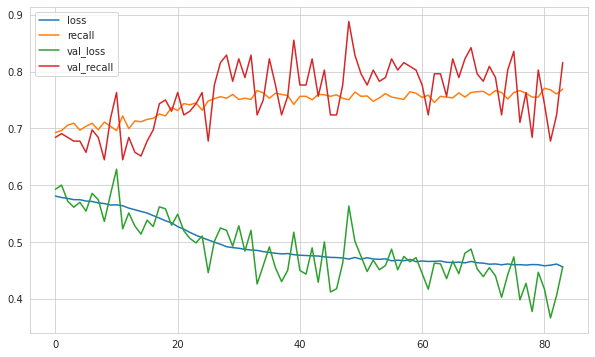

In [358]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [359]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.5378857254981995
recall :  0.6584766507148743


In [360]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1211  382]
 [ 139  268]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1593
           1       0.41      0.66      0.51       407

    accuracy                           0.74      2000
   macro avg       0.65      0.71      0.67      2000
weighted avg       0.80      0.74      0.76      2000



## GridSearchCV

In [35]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [36]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 24, activation = 'relu'))
    classifier.add(Dense(units = 12, activation = 'relu'))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [37]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [38]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [39]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 100)

parameters = {'batch_size': [32, 128],
              'optimizer': [Adam, RMSprop],
              'learn_rate': [0.0003]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 3)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weight)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Epoch 1/100
57/57 [==============================] - 2s 8ms/step - loss: 0.6890 - recall: 0.1786 - val_loss: 0.6718 - val_recall: 0.4803
Epoch 2/100
57/57 [==============================] - 0s 4ms/step - loss: 0.6786 - recall: 0.5717 - val_loss: 0.6787 - val_recall: 0.6118
Epoch 3/100
57/57 [==============================] - 0s 4ms/step - loss: 0.6699 - recall: 0.6834 - val_loss: 0.6718 - val_recall: 0.6118
Epoch 4/100
57/57 [==============================] - 0s 4ms/step - loss: 0.6609 - recall: 0.6698 - val_loss: 0.6691 - val_recall: 0.6711
Epoch 5/100
57/57 [==============================] - 0s 4ms/step - loss: 0.6512 - recall: 0.6604 - val_loss: 0.6444 - val_recall: 0.6184
Epoch 6/100
57/57 [==============================] - 0s 4ms/step - loss: 0.6418 - recall: 0.6536 - val_loss: 0.6249 - val_recall: 0.6053
Epoch 7/100
57/57 [==============================] - 0s 4ms/step - loss: 0.6351 - recall: 0.6279 - val_loss: 0.6131 - 

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2b6168da60>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 128], 'learn_rate': [0.0003],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>]},
             scoring='recall', verbose=3)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [40]:
grid_model.best_score_

0.7672372013343642

In [41]:
grid_model.best_params_

{'batch_size': 128,
 'learn_rate': 0.0003,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam}

In [42]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
2,0.767,0.009,1,"{'batch_size': 128, 'learn_rate': 0.0003, 'opt..."
0,0.733,0.035,2,"{'batch_size': 32, 'learn_rate': 0.0003, 'opti..."
1,0.716,0.029,3,"{'batch_size': 32, 'learn_rate': 0.0003, 'opti..."
3,0.688,0.033,4,"{'batch_size': 128, 'learn_rate': 0.0003, 'opt..."


In [43]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1166  427]
 [  88  319]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1593
           1       0.43      0.78      0.55       407

    accuracy                           0.74      2000
   macro avg       0.68      0.76      0.69      2000
weighted avg       0.83      0.74      0.77      2000



63/63 [==============================] - 0s 1ms/step


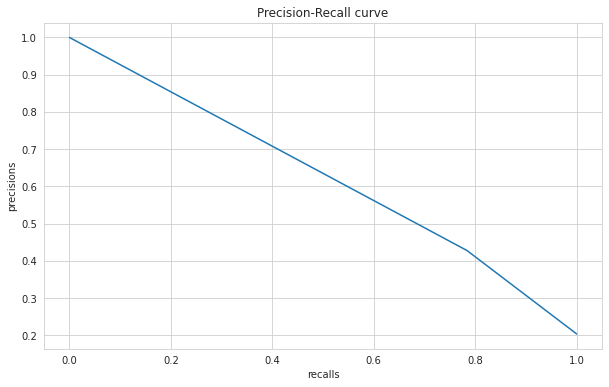

In [45]:
y_pred_proba = grid_model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

# Final Model and Model Deployment

In [47]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [48]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(12, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [49]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [50]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 100, verbose = 1,
          callbacks = [early_stop], class_weight=class_weight)

Epoch 1/100
63/63 [==============================] - 1s 7ms/step - loss: 0.6750 - recall: 0.5190 - val_loss: 0.6754 - val_recall: 0.6929
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6449 - recall: 0.6558 - val_loss: 0.6427 - val_recall: 0.6388
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6249 - recall: 0.6294 - val_loss: 0.6282 - val_recall: 0.6364
Epoch 4/100
63/63 [==============================] - 0s 5ms/step - loss: 0.6137 - recall: 0.6663 - val_loss: 0.6572 - val_recall: 0.7592
Epoch 5/100
63/63 [==============================] - 0s 5ms/step - loss: 0.6040 - recall: 0.6785 - val_loss: 0.6608 - val_recall: 0.7789
Epoch 6/100
63/63 [==============================] - 0s 4ms/step - loss: 0.5947 - recall: 0.6908 - val_loss: 0.5885 - val_recall: 0.6658
Epoch 7/100
63/63 [==============================] - 0s 4ms/step - loss: 0.5873 - recall: 0.6933 - val_loss: 0.6012 - val_recall: 0.7076
Epoch 8/100
63/63 [======================

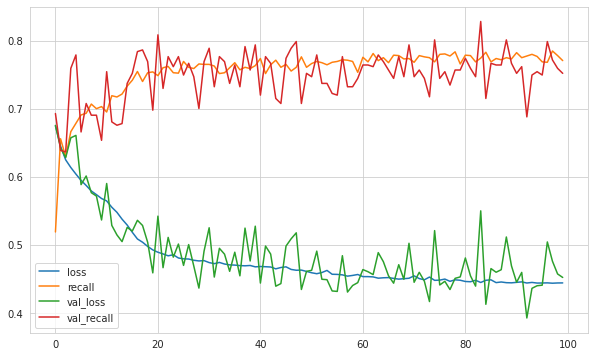

In [51]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [52]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.4522615373134613
recall :  0.751842737197876


In [53]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 3ms/step
[[1259  334]
 [ 101  306]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1593
           1       0.48      0.75      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



In [54]:
model.save('model_churn.h5')

## Prediction

In [55]:
from tensorflow.keras.models import load_model

In [56]:
model_churn = load_model('model_churn.h5')
scaler_churn = pickle.load(open("scaler_churn", "rb"))

In [57]:
single_sample = df.drop('Exited', axis = 1).iloc[0:1, :]
single_sample

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,France,Germany,Spain
RowNumber,,,,,,,,,,,,,
1,619,42,2,0.000,1,1,1,101348.880,1,0,1,0,0


In [58]:
single_sample = scaler_churn.transform(single_sample)
single_sample

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 1.        , 0.        ,
        1.        , 0.        , 0.        ]])

In [59]:
(model_churn.predict(single_sample) > 0.5).astype("int32")

1/1 [==============================] - 0s 47ms/step


array([[1]], dtype=int32)

In [60]:
df["Exited"].iloc[0]

1